# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

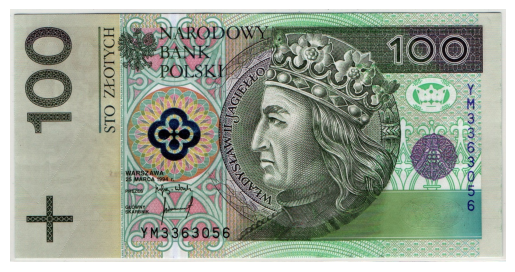

In [2]:
money_img = cv2.imread('100zloty.jpg')

plt.imshow(money_img)
plt.axis('off')
plt.show()

#### Transforming the image into a grayscale

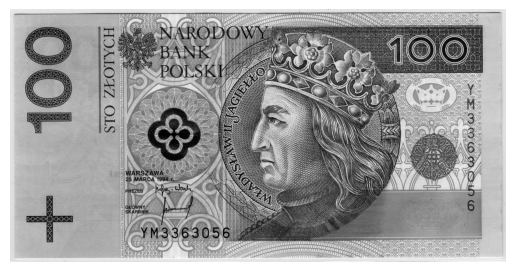

In [3]:
money_in_grayscale = cv2.cvtColor(money_img, cv2.COLOR_BGR2GRAY)

plt.imshow(money_in_grayscale, cmap='gray')
plt.axis('off')
plt.show()

#### Decomposition

In [4]:
decomposed = []

for i in range(8):
    bit_plane = (money_in_grayscale >> i) & 1
    decomposed.append(bit_plane * 255)


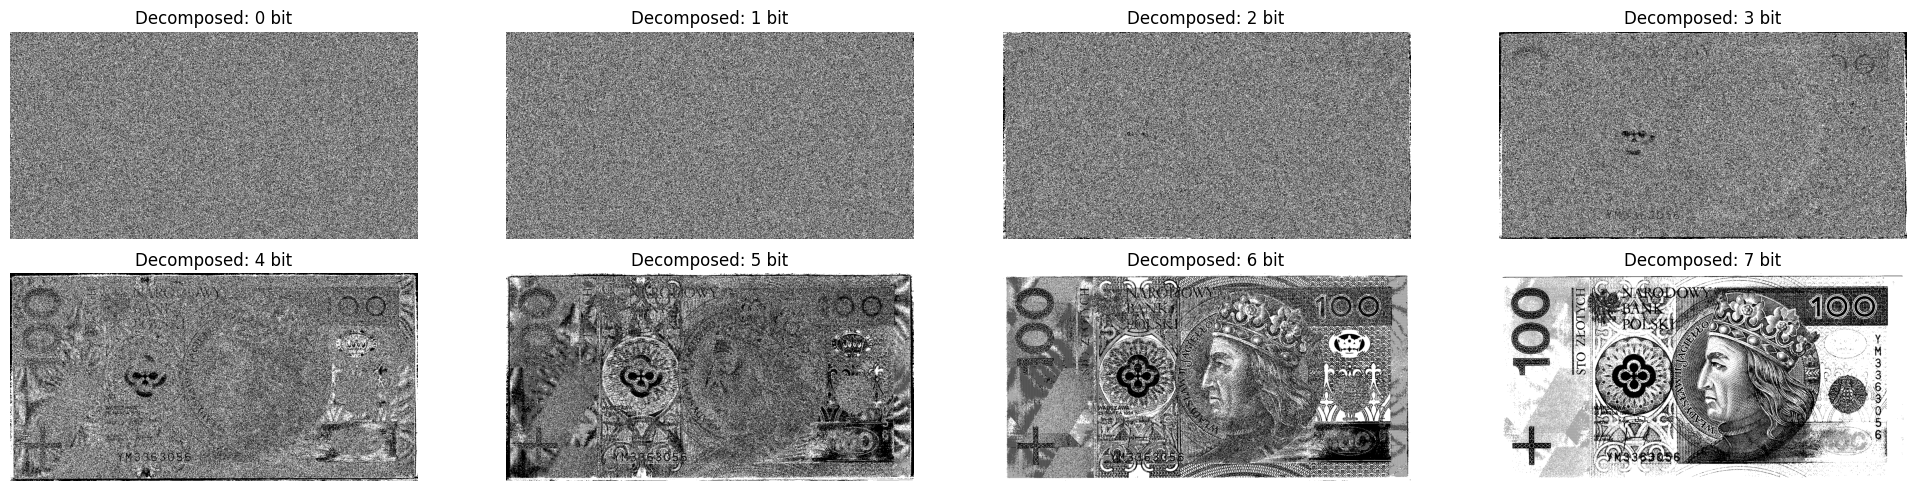

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5))  

for i, dec in enumerate(decomposed):
    ax = axes[i // 4, i % 4]  
    ax.imshow(dec, cmap='gray')
    ax.set_title(f'Decomposed: {i} bit')
    ax.axis('off')  

plt.tight_layout()
plt.show()


#### Recovery

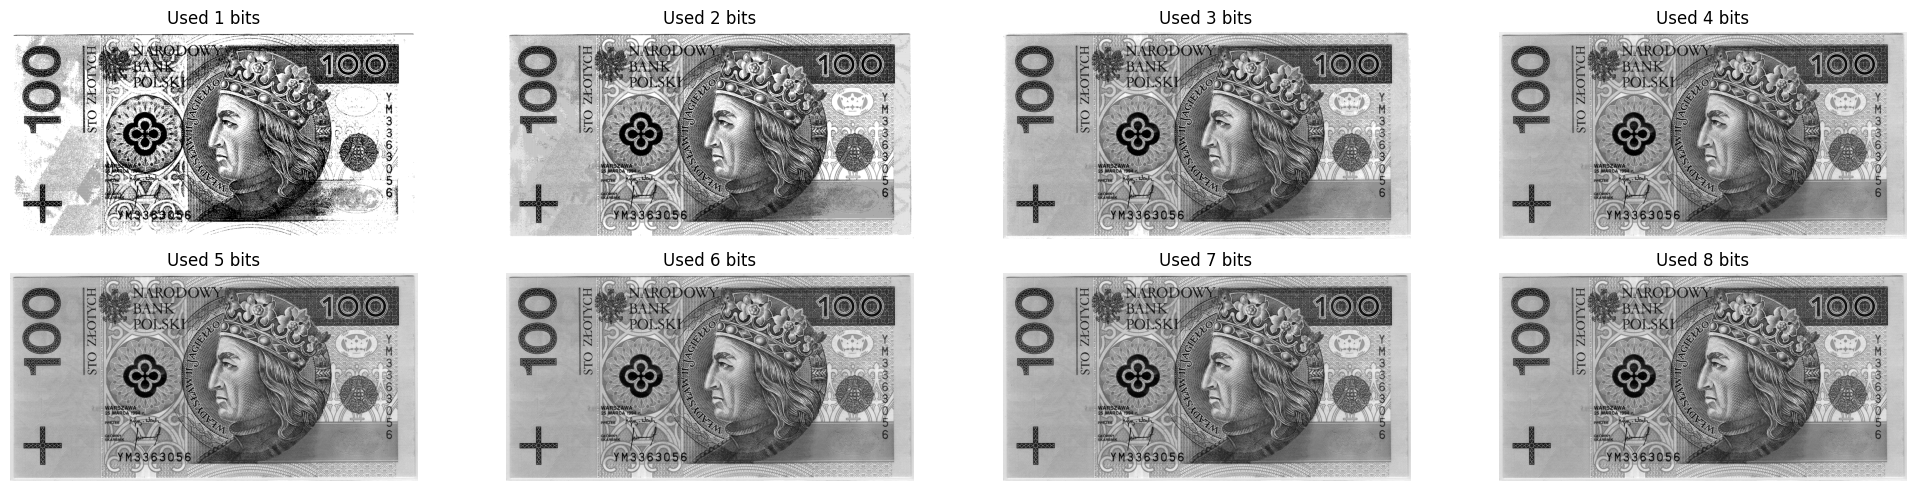

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5))  

for bits in range(1, 9):
    recovered = np.zeros_like(money_in_grayscale, dtype=np.uint8)
    
    for i in range(8 - bits, 8):  
        recovered += (decomposed[i] // 255) * (2 ** i)  

    axes[(bits - 1) // 4, (bits - 1) % 4].imshow(recovered, cmap='gray')
    axes[(bits - 1) // 4, (bits - 1) % 4].set_title(f'Used {bits} bits')
    axes[(bits - 1) // 4, (bits - 1) % 4].axis('off') 

plt.tight_layout()
plt.show()